In [16]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
%matplotlib notebook


df = pd.read_csv(
    "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Univariate analysis

In [12]:
setosa = df.loc[df['species'] == 'setosa']
virginica = df.loc[df['species']== 'virginica']
versicolor = df.loc[df['species']=='versicolor']

<IPython.core.display.Javascript object>


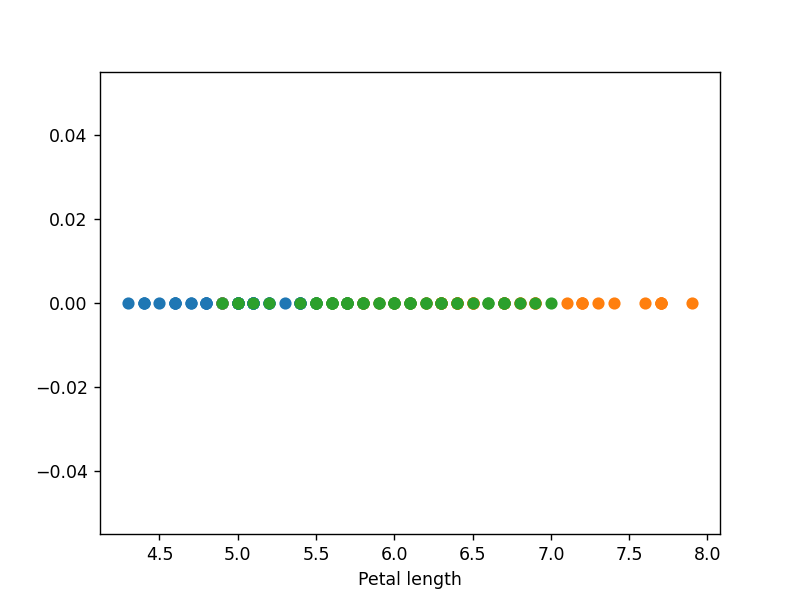

Text(0.5, 0, 'Petal length')

In [13]:
plt.plot(setosa['sepal_length'],np.zeros_like(setosa['sepal_length']),'o')
plt.plot(virginica['sepal_length'],np.zeros_like(virginica['sepal_length']),'o')
plt.plot(versicolor['sepal_length'],np.zeros_like(versicolor['sepal_length']),'o');
plt.xlabel('Petal length')

# Bivariate analysis

<IPython.core.display.Javascript object>


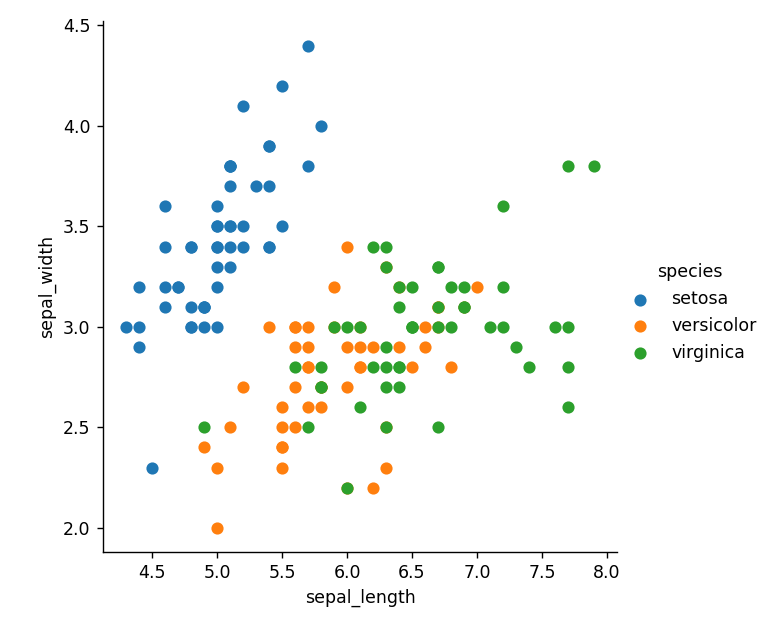

In [14]:
import seaborn as sns
            #dataset, hue is for different plots,
sns.FacetGrid(df  , hue='species',height=5).map(plt.scatter,'sepal_length','sepal_width').add_legend();

# Multivariate

<IPython.core.display.Javascript object>


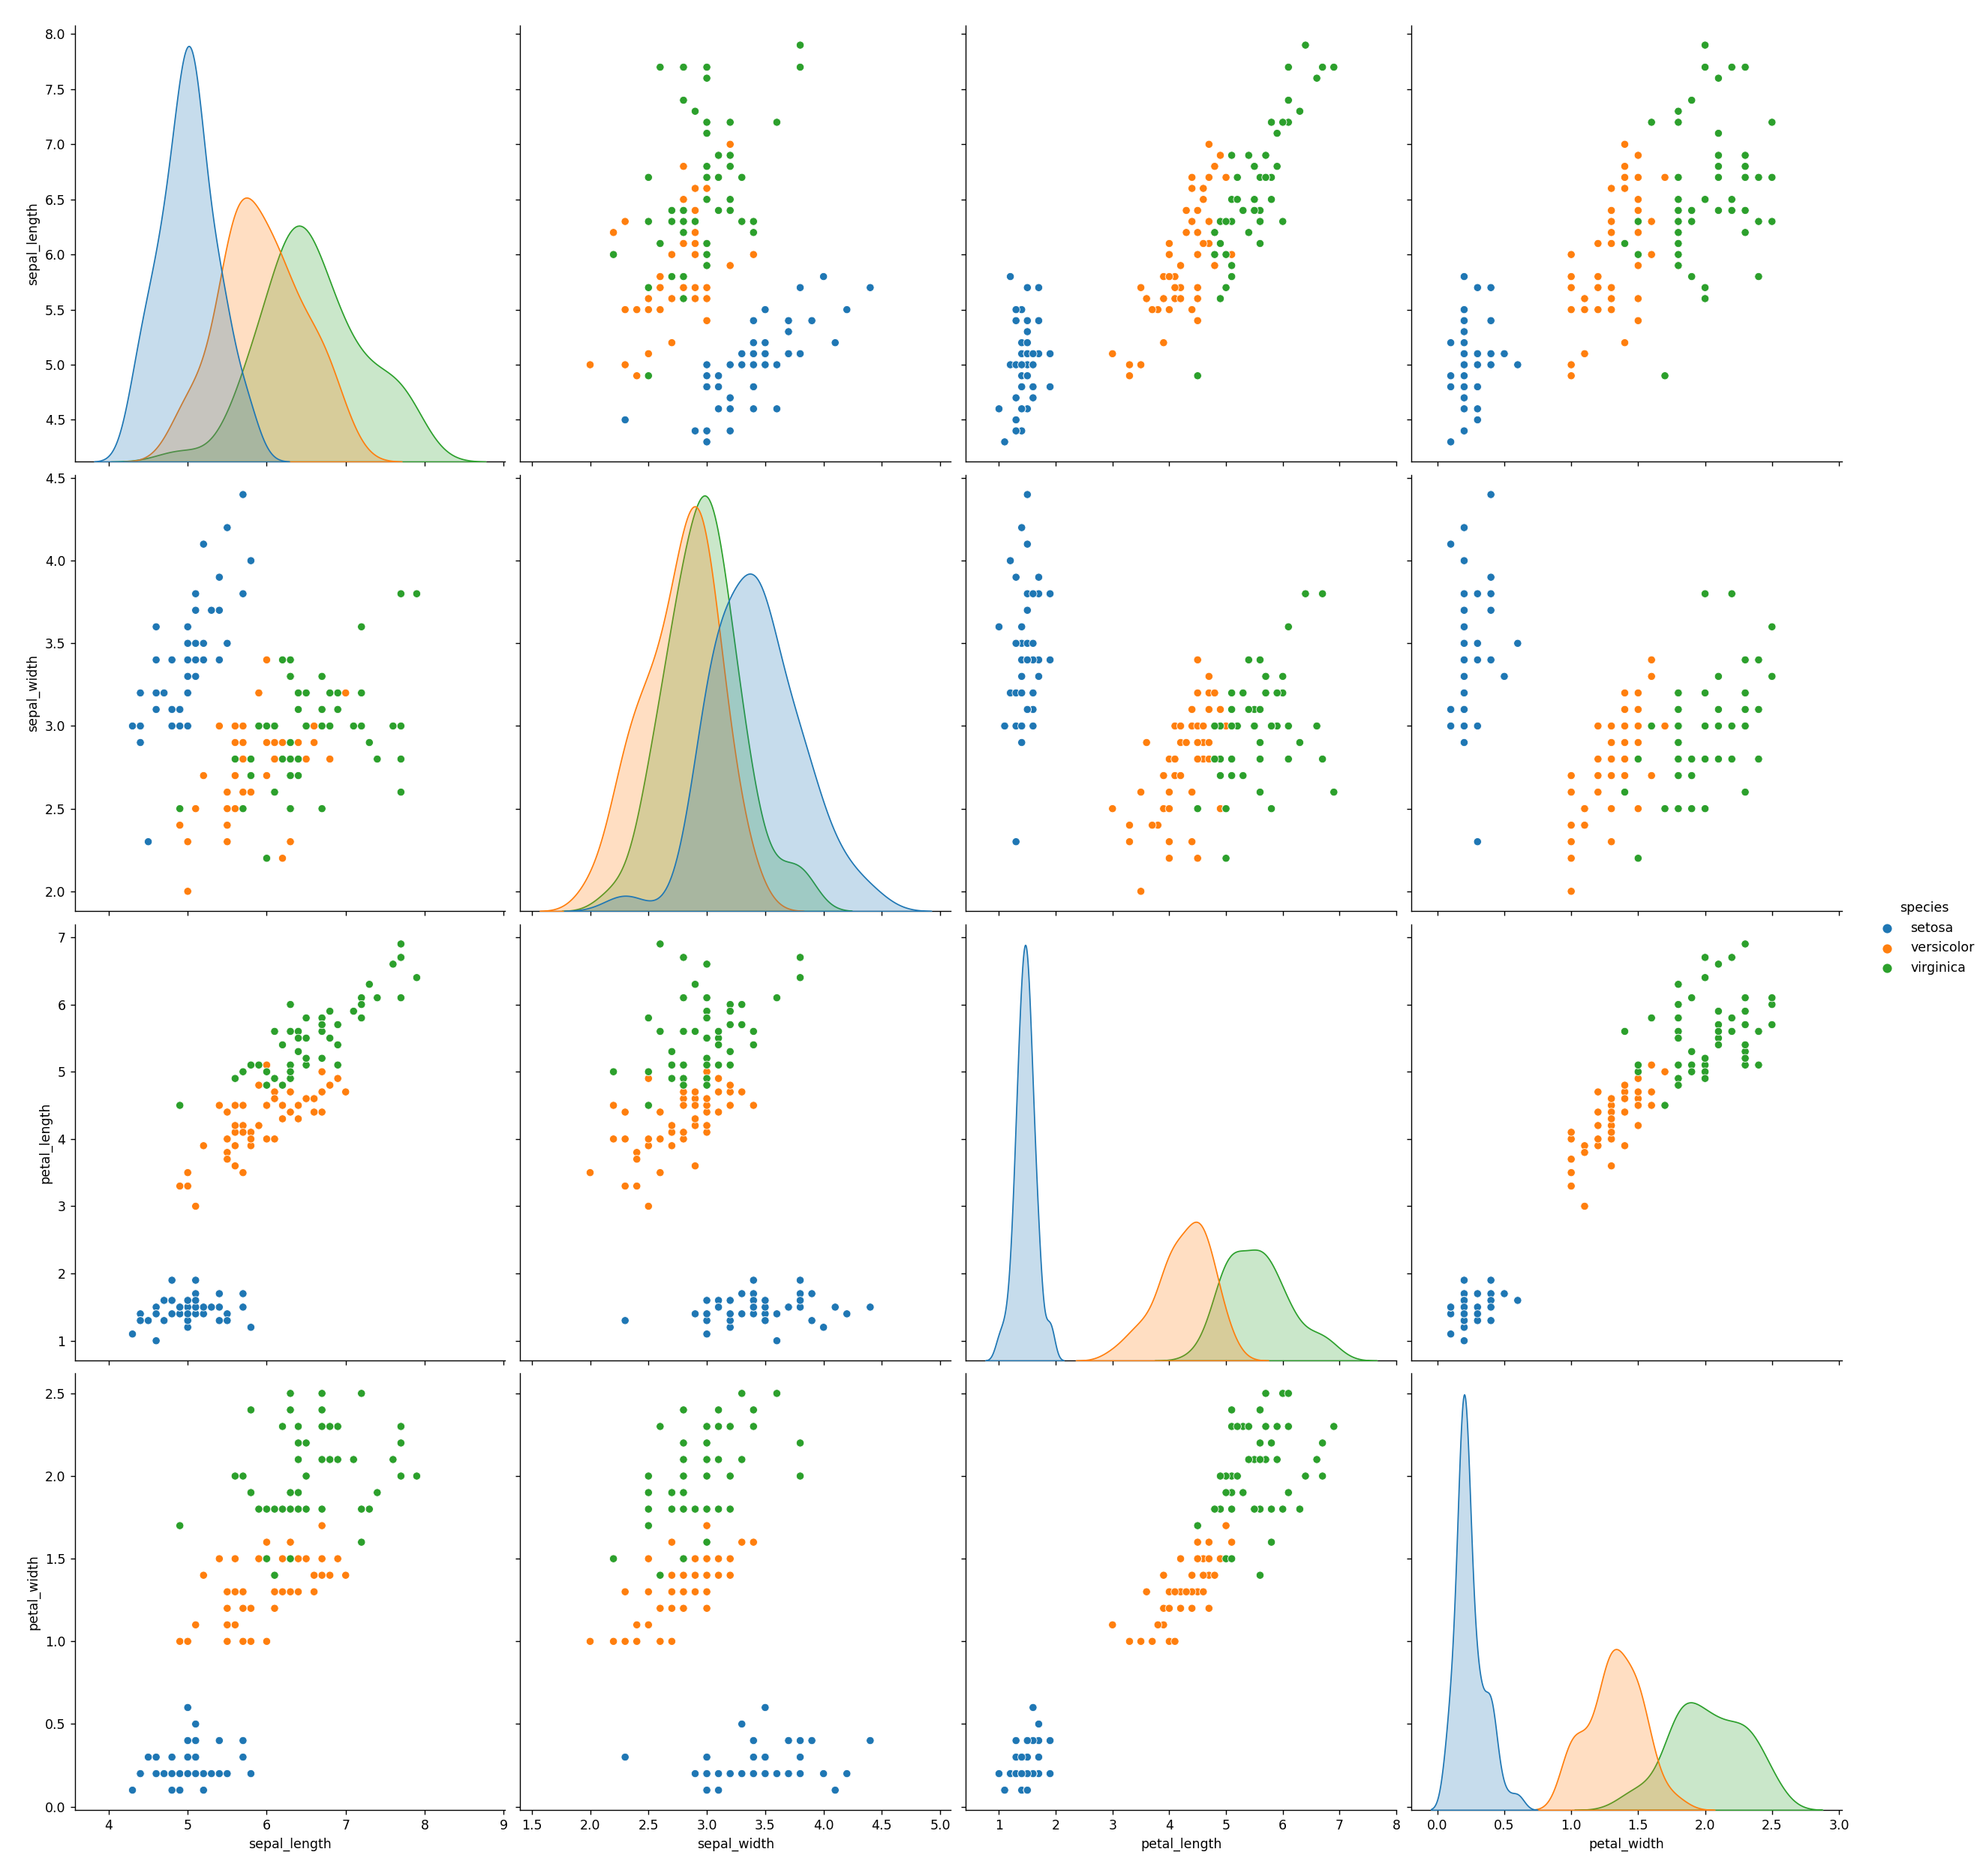

In [15]:
sns.pairplot(df,hue='species',height=5)

In [75]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
rdf = RandomForestClassifier(max_depth = 1, n_estimators = 6, max_features = 2 , random_state = 2).fit(X_train, y_train)
test_score = rdf.score(X_test, y_test)
train_score = rdf.score(X_train, y_train)
print('Training Accuracy Score : {:.2f}'.format(train_score))
print('Testing Accuracy Score : {:2f}'.format(test_score))

Training Accuracy Score : 0.96
Testing Accuracy Score : 0.921053


In [76]:
confusion = confusion_matrix(y_test, rdf.predict(X_test))
confusion

array([[15,  0,  0],
       [ 0,  9,  3],
       [ 0,  0, 11]], dtype=int64)